In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from lib import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np

In [2]:
rec = Recommender(lam=0.01, gamma=0.01, tau=0.01)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv")
print(len(rec.users))
print(len(rec.movies))

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|██████████| 59047/59047 [00:23<00:00, 2510.15it/s]  

162541
59047


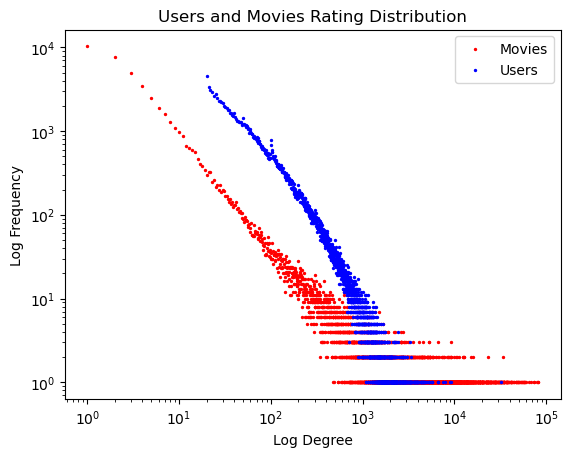

In [3]:
user_freq = {}
movie_freq = {}

#iterate over users
for user in rec.users:
    degree = len(user.ratings)
    if degree not in user_freq:
        user_freq[degree] = 1
    else:
        user_freq[degree] += 1

for movie in rec.movies:
    degree = len(movie.ratings)

    if degree not in movie_freq:
        movie_freq[degree] = 1
    else:
        movie_freq[degree] += 1

m_deg = [degree for degree in movie_freq.keys()]
m_freq = [freq for freq in movie_freq.values()]
plt.scatter(m_deg, m_freq, c='red', s=2, label='Movies')

u_deg = [degree for degree in user_freq.keys()]
u_freq = [freq for freq in user_freq.values()]
plt.scatter(u_deg, u_freq, c='blue', s=2, label='Users')
plt.xscale("log")
plt.yscale("log")


plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.legend()
plt.title("Users and Movies Rating Distribution")

plt.show()

In [5]:
statistics = rec.fit_biases_only(max_iter=10)

Initialized variables and calculated statistics: 28.909509897232056s


  0%|          | 0/10 [00:00<?, ?it/s]

Updated user embeddings and biases: 2.2900774478912354
Updated item embeddings and biases: 1.3692331314086914


 10%|█         | 1/10 [00:32<04:55, 32.79s/it]

Updated statistics: 29.132213830947876
Updated user embeddings and biases: 2.5087010860443115
Updated item embeddings and biases: 1.4833109378814697


 20%|██        | 2/10 [01:06<04:26, 33.30s/it]

Updated statistics: 29.657463550567627
Updated user embeddings and biases: 2.2989747524261475
Updated item embeddings and biases: 1.4212679862976074


 30%|███       | 3/10 [01:39<03:52, 33.18s/it]

Updated statistics: 29.321324825286865
Updated user embeddings and biases: 2.5428097248077393
Updated item embeddings and biases: 1.5523536205291748


 40%|████      | 4/10 [02:11<03:16, 32.76s/it]

Updated statistics: 28.025445699691772
Updated user embeddings and biases: 2.1903347969055176
Updated item embeddings and biases: 1.256159782409668


 50%|█████     | 5/10 [02:42<02:40, 32.06s/it]

Updated statistics: 27.360902547836304
Updated user embeddings and biases: 2.1860873699188232
Updated item embeddings and biases: 1.2620704174041748


 60%|██████    | 6/10 [03:13<02:06, 31.66s/it]

Updated statistics: 27.443955183029175
Updated user embeddings and biases: 2.420417547225952
Updated item embeddings and biases: 1.5312566757202148


 70%|███████   | 7/10 [03:46<01:36, 32.25s/it]

Updated statistics: 29.502099990844727
Updated user embeddings and biases: 2.6064014434814453
Updated item embeddings and biases: 1.5279262065887451


 80%|████████  | 8/10 [04:20<01:05, 32.64s/it]

Updated statistics: 29.35317349433899
Updated user embeddings and biases: 2.5439136028289795
Updated item embeddings and biases: 1.517505407333374


 90%|█████████ | 9/10 [04:53<00:32, 32.80s/it]

Updated statistics: 29.073662281036377
Updated user embeddings and biases: 2.540102481842041
Updated item embeddings and biases: 1.4762647151947021


100%|██████████| 10/10 [05:26<00:00, 32.66s/it]

Updated statistics: 29.201791763305664


[1701669.59, 104529.35078438374, 101119.62141023377, 100835.74004468598, 100692.29948135879, 100559.16356531557, 100428.94614205715, 100300.97401561253, 100175.12093652276, 100051.33526395904, 99929.57959977438]


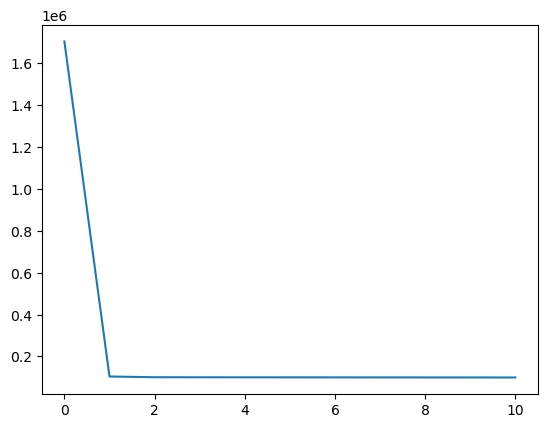

In [6]:
plt.plot(statistics['neg_log_liks'])
print(statistics['neg_log_liks'])

[3.6896212528443946, 0.8656620302408609, 0.8516225182479499, 0.8510887888701893, 0.8510511178963991, 0.8510329237515599, 0.8510191719270784, 0.8510082325556685, 0.85099890098791, 0.8509904844962405, 0.8509826401179524]


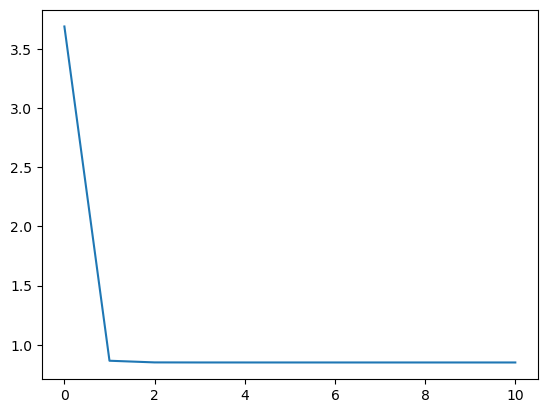

In [7]:
plt.plot(statistics['RMSEs'])
print(statistics['RMSEs'])

[1.0002581152208154, 1.0002581152208154, 2.353820049749096, 2.349981789105825, 2.336052392730228, 2.3279710048970075, 2.31501373384196, 2.300830911042651, 2.287188312322497, 2.2746103004033764, 2.263096166702058, 2.2525594472561665]


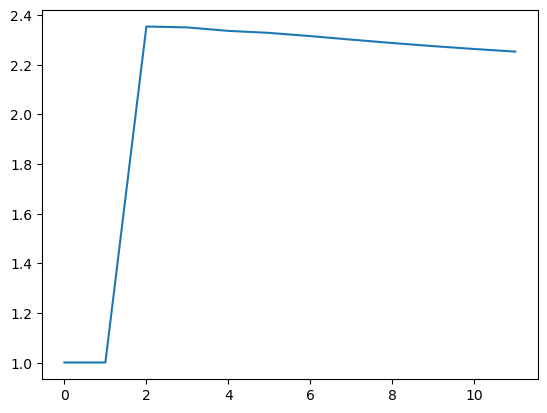

In [7]:
plt.plot(statistics['user_embed_length'])
print(statistics['user_embed_length'])

[0.9993240187981606, 0.9993240187981606, 1.1882046737337197, 1.489617307848181, 1.580128229191945, 1.634904015516358, 1.6819095732400533, 1.7256827972213797, 1.767296091714724, 1.8069054894252168, 1.8445529614372007, 1.8801912775338618]


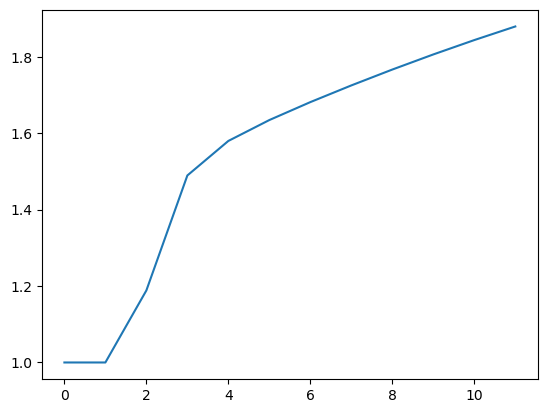

In [8]:
plt.plot(statistics['item_embed_length'])
print(statistics['item_embed_length'])

[0.0, 3.6138911859350697, 3.5475721895149244, 3.517560393144796, 3.4939451616980794, 3.471374965667036, 3.448999608343597, 3.4267392316517773, 3.4046165612455095, 3.3826526335602956, 3.360858366482715]


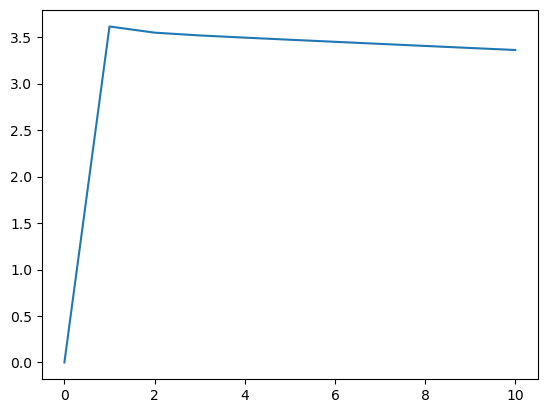

In [8]:
plt.plot(statistics['mean_user_bias'])
print(statistics['mean_user_bias'])

[0.0, -0.16645289371302582, -0.19392517335916346, -0.18653658127170125, -0.1702604241727999, -0.152230445743067, -0.13412229604016082, -0.11623320791167698, -0.09856937074521656, -0.08109863780358643, -0.06379669009576386]


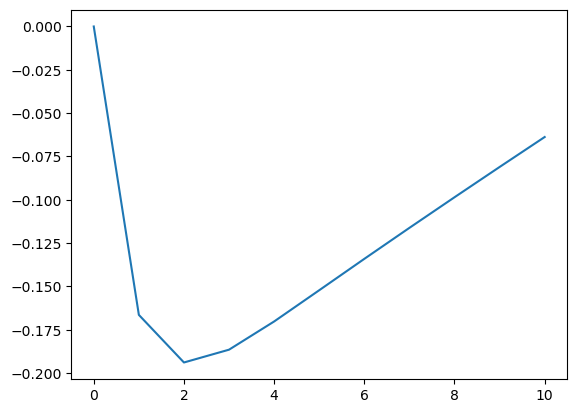

In [9]:
plt.plot(statistics['mean_item_bias'])
print(statistics['mean_item_bias'])